In [1]:
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the .mat file
data = scipy.io.loadmat(r"D:\DEPAUL\OTHER\PROJECTS\Gait analysis\Dataset\gait+classification\PersonGaitDataSet.mat")

#print(data.keys())

# Extract feature matrix (X) and target labels (Y)
X = data['X']
Y = data['Y']  # Target labels

# Check shapes
print("Shape of X:", X.shape)  # (num_samples, num_features)
print("Shape of Y:", Y.shape)  # (num_samples, 1)


Shape of X: (48, 321)
Shape of Y: (48, 1)


In [2]:
df_X = pd.DataFrame(X)
df_Y = pd.DataFrame(Y, columns=['Person_ID'])  # Rename the Y column for clarity

# Merge both DataFrames
df = pd.concat([df_Y, df_X], axis=1)

# Display first few rows
print(df.head(25))

    Person_ID     0     1    2      3      4      5      6      7      8  ...  \
0           0  1.32  4.15  4.0  1.054  1.054  1.050  1.060  0.043  0.044  ...   
1           0  1.29  0.00  0.9  1.119  1.137  1.060  1.065  0.406  0.567  ...   
2           0  1.25  5.06 -3.8  1.109  1.109  1.105  1.115  0.048  0.056  ...   
3           1  1.21  0.00 -6.3  1.185  1.162  1.155  1.160  0.215  0.103  ...   
4           1  1.20  4.43 -7.9  1.188  1.172  1.175  1.177  0.153  0.052  ...   
5           1  1.20  0.00 -8.4  1.235  1.213  1.165  1.165  0.567  0.406  ...   
6           2  1.37  0.00  1.0  1.239  1.215  1.140  1.145  0.648  0.460  ...   
7           2  1.46  0.00 -4.5  1.160  0.168  1.100  1.100  0.348  0.346  ...   
8           2  1.36  0.00  2.8  1.185  1.197  1.125  1.125  0.450  0.523  ...   
9           3  1.29  5.83 -4.8  1.167  1.170  1.157  1.155  0.086  0.068  ...   
10          3  1.30  7.84 -5.8  1.161  1.158  1.140  1.145  0.073  0.091  ...   
11          3  1.58  0.00 -7

In [11]:
#checking for missing values
df.isnull().sum()

df.to_csv(r"D:\DEPAUL\OTHER\PROJECTS\Gait analysis\Dataset\Gait_analysis.csv", index=False)

In [12]:
#handling nan values
missing_counts=df_X.isnull().sum()
print(missing_counts[missing_counts > 0])

#replacing NAN value
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)  # Use 5 nearest neighbors
X_imputed = imputer.fit_transform(df_X)  # Returns a NumPy array

df_X_filled = pd.DataFrame(X_imputed, columns=df_X.columns)  # Convert back to DataFrame
#checking for nan values after handling
c=df_X_filled.isnull().sum()
print(c[c>0])

111    1
dtype: int64
Series([], dtype: int64)


In [ ]:
#df_X_filled.to_csv(r"D:\DEPAUL\OTHER\PROJECTS\Gait analysis\Dataset\df_X_filled.csv", index=False


_IncompleteInputError: incomplete input (3670462245.py, line 1)

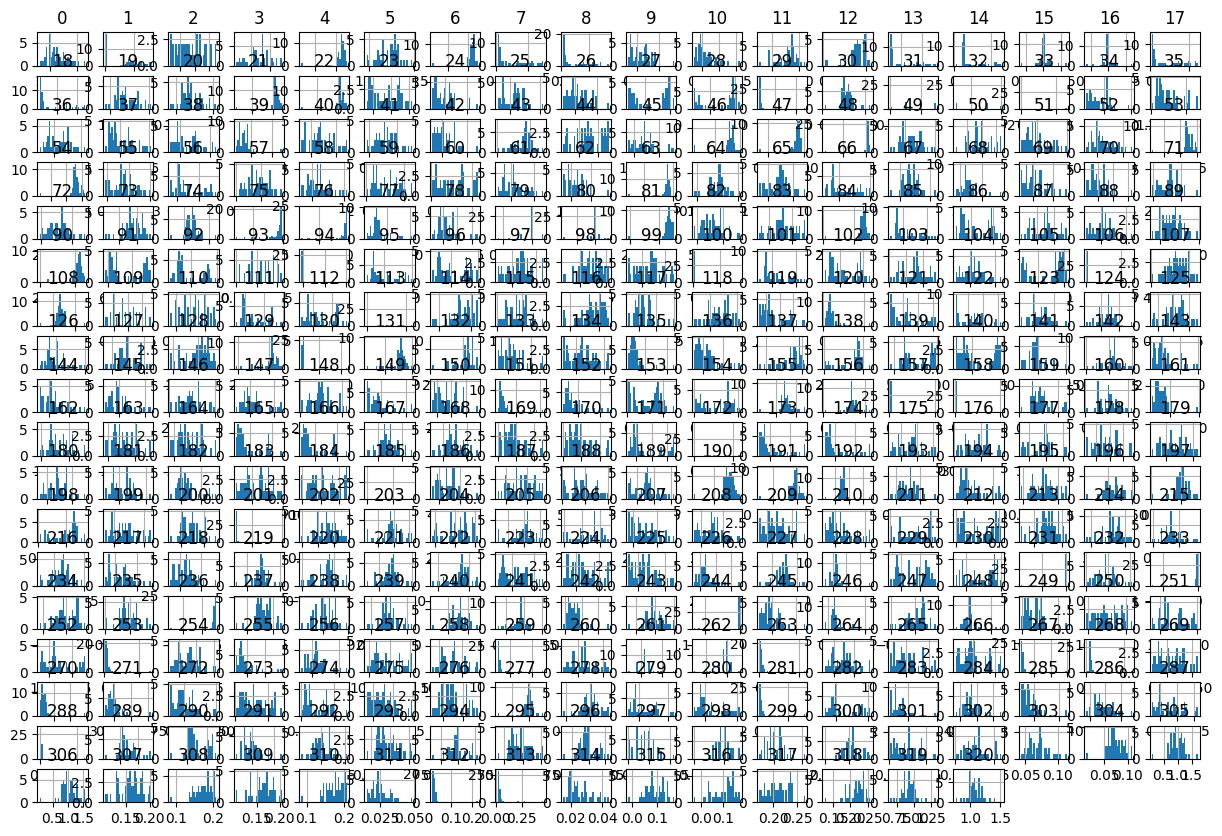

In [14]:



df_X.hist(figsize=(15, 10), bins=30)
plt.show()



In [16]:
 # Ensure we have balanced data across individuals

print(df_Y['Person_ID'].value_counts()) 


Person_ID
0     3
1     3
2     3
3     3
4     3
5     3
6     3
7     3
8     3
9     3
10    3
11    3
12    3
13    3
14    3
15    3
Name: count, dtype: int64


In [15]:
#checking variance of the variables

##computing variance for each variable
variances = np.var(df_X, axis=0)

#converting to dataframe
var_df=pd.DataFrame({"Feature":df_X.columns,"variance":variances})

#sorting the variance
var_df.sort_values(by="variance", ascending= False, ignore_index=True)

,Feature,variance
0,185,3.774525e+07
1,100,3.845710e+05
2,106,2.252347e+05
3,172,1.098743e+05
4,113,1.070535e+05
...,...,...
316,284,2.420139e-05
317,300,1.403776e-05
318,299,1.098438e-05
319,298,7.567708e-06


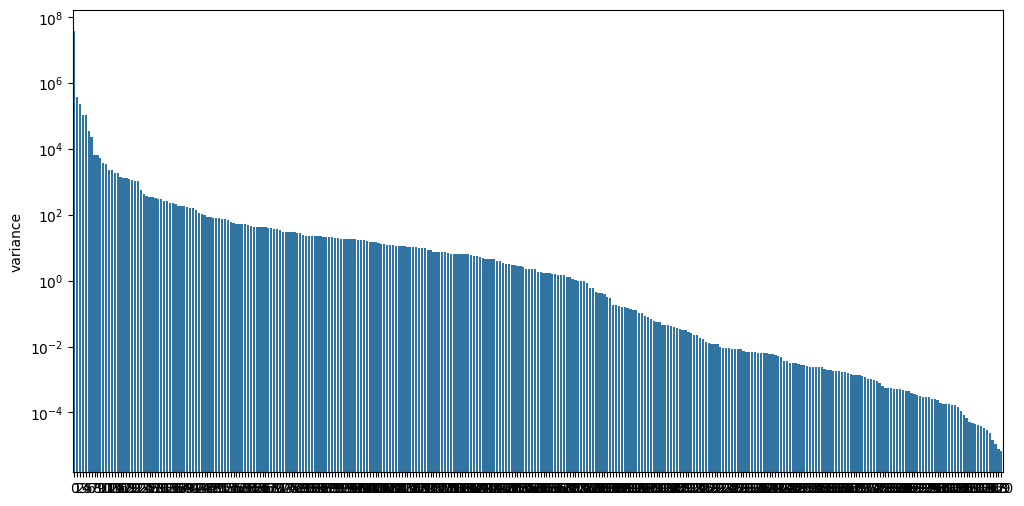

In [17]:
#visualizing the Variance
import seaborn as sns
var_sorted= var_df.sort_values(by="variance", ascending= False, ignore_index=True)
var_sorted.head()
cutoff_threshold = 0.05
plt.figure(figsize=(12, 6))
sns.barplot(var_sorted['variance'])
#plt.axhline(y=cutoff_threshold, color="red", linestyle="--", linewidth=2, label=f"Cutoff: {cutoff_threshold}")

plt.yscale("log")
plt.show()

In [18]:
thresholds = [0.01, 0.001, 0.0001, 0.02]  # Try different cutoffs

for t in thresholds:
    remaining = var_sorted[var_sorted["variance"] >= t].shape[0]
    print(f"Threshold: {t}, Remaining Features: {remaining}")


Threshold: 0.01, Remaining Features: 223
Threshold: 0.001, Remaining Features: 276
Threshold: 0.0001, Remaining Features: 307
Threshold: 0.02, Remaining Features: 216


In [19]:
#feature selection


#variance threshold

from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.02)  # Remove features with very low variance
X_selected = selector.fit_transform(df_X)

#Recursuve feature elimination
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
selector = RFE(model, n_features_to_select=100, step=10)  # Select top 50 features
X_selected = selector.fit_transform(df_X, df_Y)
X_selected = pd.DataFrame(X_selected, columns=df_X.columns[selector.support_])  # Keep only selected feature names




d:\DEPAUL\OTHER\PROJECTS\Gait analysis\venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\DEPAUL\OTHER\PROJECTS\Gait analysis\venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\DEPAUL\OTHER\PROJECTS\Gait analysis\venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\DEPAUL\OTHER\PROJECTS\Gait analysis\venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed whe

In [20]:
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Define features and target
X = X_selected   # Features
Y = df_Y['Person_ID']  # Target variable

# Initialize Leave-One-Out CV
loo = LeaveOneOut()

# Store accuracy scores
scores_m1 = []
scores_m2 = []

# Perform LOO Cross-Validation
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

    # Train model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model2 = RandomForestClassifier(max_depth=10, min_samples_leaf= 1, min_samples_split=2, n_estimators=300)
    model3 = RandomForestClassifier(
    max_depth=5,                # Restrict depth to prevent memorization
    min_samples_split=5,        # Require at least 5 samples to split a node
    min_samples_leaf=3,         # Require at least 3 samples per leaf
    n_estimators=200,           # Reduce the number of trees to 200 (avoid excessive complexity)
    random_state=42
)


    model.fit(X_train, Y_train)
    model2.fit(X_train, Y_train)

    # Predict
    Y_pred_m1 = model.predict(X_test)
    Y_pred_m2 = model2.predict(X_test)

    # Store accuracy score
    scores_m1.append(accuracy_score(Y_test, Y_pred_m1))
    scores_m2.append(accuracy_score(Y_test, Y_pred_m2))

# Print final results
print(f"Average Accuracy with model1: {np.mean(scores_m1):.4f} ± {np.std(scores_m1):.4f}")
print(f"Average Accuracy with model2: {np.mean(scores_m2):.4f} ± {np.std(scores_m2):.4f}")


Average Accuracy with model1: 0.9583 ± 0.1998
Average Accuracy with model2: 0.9583 ± 0.1998


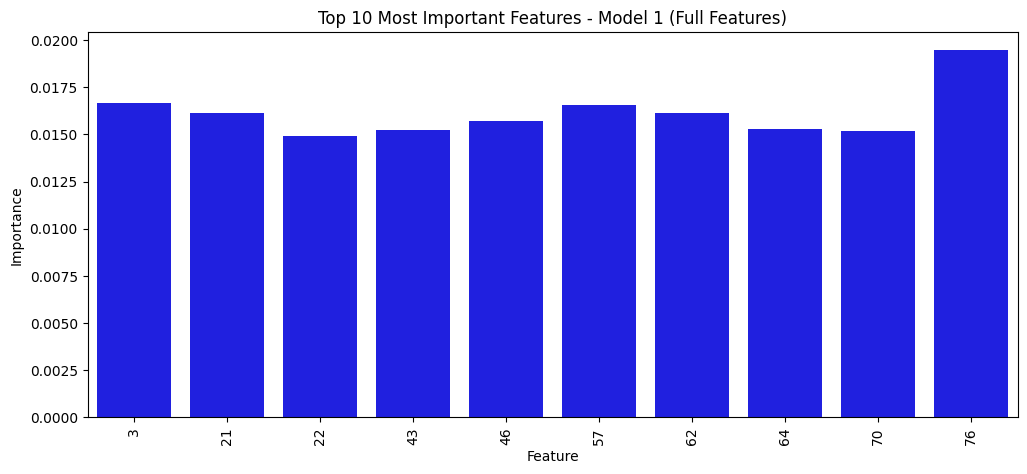

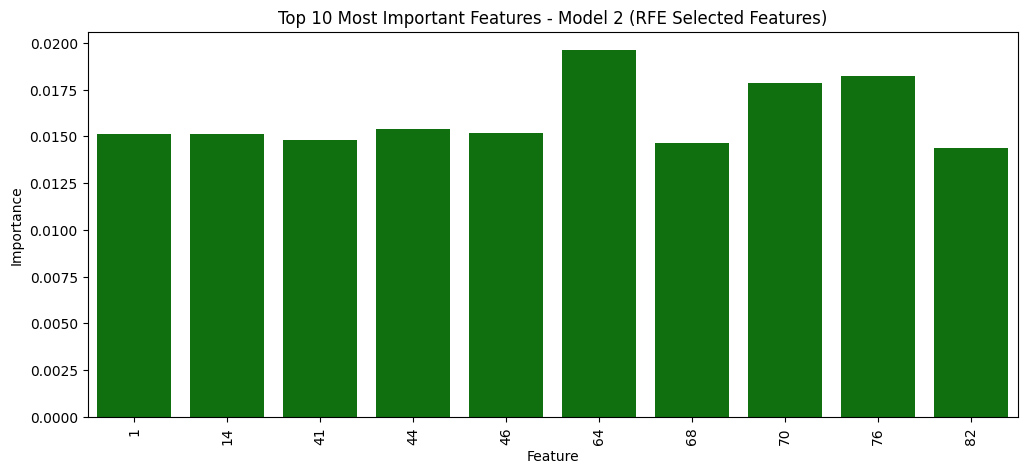

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from both models
feature_importances_m1 = model.feature_importances_
feature_importances_m2 = model2.feature_importances_

# Sort features by importance for both models
sorted_indices_m1 = np.argsort(feature_importances_m1)[::-1]
sorted_indices_m2 = np.argsort(feature_importances_m2)[::-1]

# Select top 10 features for each model
top_features_m1 = np.array(df_X_filled.columns)[sorted_indices_m1[:10]]
top_importances_m1 = feature_importances_m1[sorted_indices_m1[:10]]

top_features_m2 = np.array(df_X_filled.columns)[sorted_indices_m2[:10]]
top_importances_m2 = feature_importances_m2[sorted_indices_m2[:10]]

# Plot feature importance for Model 1
plt.figure(figsize=(12, 5))
sns.barplot(x=top_features_m1, y=top_importances_m1, color="blue")
plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Top 10 Most Important Features - Model 1 (Full Features)")
plt.show()

# Plot feature importance for Model 2
plt.figure(figsize=(12, 5))
sns.barplot(x=top_features_m2, y=top_importances_m2, color="green")
plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Top 10 Most Important Features - Model 2 (RFE Selected Features)")
plt.show()


check for overfitting of data

In [22]:
from sklearn.model_selection import train_test_split

# Split dataset into 80% training and 20% testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



# Train model on training data only
model3.fit(X_train, Y_train)

# Test on unseen data
Y_pred_test = model3.predict(X_test)

# Evaluate test accuracy
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(Y_test, Y_pred_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


Test Accuracy: 0.7000


trying 2 fold cross validation

In [23]:
# 2- fold cross validation
from sklearn.model_selection import StratifiedKFold
import numpy as np

skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)
scores = []

for train_index, test_index in skf.split(X, Y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    model2.fit(X_train, Y_train)
    Y_pred = model3.predict(X_test)
    scores.append(accuracy_score(Y_test, Y_pred))

print(f"Cross-Validation Accuracy: {np.mean(scores):.4f} ± {np.std(scores):.4f}")


Cross-Validation Accuracy: 0.9375 ± 0.0208


In [24]:
from sklearn.model_selection import RepeatedStratifiedKFold
import numpy as np

# Define Repeated Stratified K-Fold with 2 splits and 10 repetitions
rskf = RepeatedStratifiedKFold(n_splits=2, n_repeats=10, random_state=42)

scores = []

for train_index, test_index in rskf.split(X, Y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

    model2.fit(X_train, Y_train)
    Y_pred = model3.predict(X_test)
    scores.append(accuracy_score(Y_test, Y_pred))

print(f"Repeated Stratified 2-Fold CV Accuracy: {np.mean(scores):.4f} ± {np.std(scores):.4f}")


Repeated Stratified 2-Fold CV Accuracy: 0.9375 ± 0.0208


Confusion Matrix

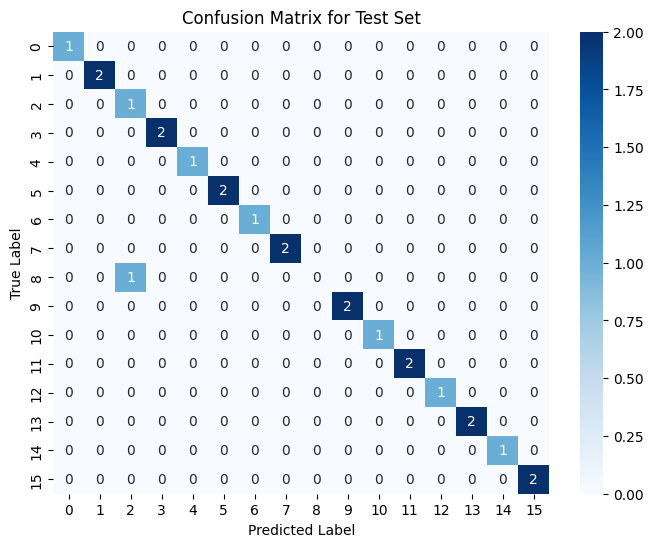

In [25]:

from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(Y_test), yticklabels=np.unique(Y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Test Set")
plt.show()


comparison with and without PCA


In [ ]:
from sklearn.decomposition import PCA

# Apply PCA (reduce to 10 components)
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_original)

# Initialize Leave-One-Out CV
loo = LeaveOneOut()

# Store accuracy scores
scores_no_pca = []
scores_pca = []

# Perform LOO Cross-Validation for both No PCA and PCA
for train_index, test_index in loo.split(X_original):
    # Split for No PCA
    X_train_orig, X_test_orig = X_original.iloc[train_index], X_original.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

    # Split for PCA
    X_train_pca, X_test_pca = X_pca[train_index], X_pca[test_index]

    # Initialize models
    model_orig = RandomForestClassifier(n_estimators=100, random_state=42)
    model_pca = RandomForestClassifier(n_estimators=100, random_state=42)

    # Train models
    model_orig.fit(X_train_orig, Y_train)
    model_pca.fit(X_train_pca, Y_train)

    # Make predictions
    Y_pred_orig = model_orig.predict(X_test_orig)
    Y_pred_pca = model_pca.predict(X_test_pca)

    # Compute accuracy
    acc_orig = accuracy_score(Y_test, Y_pred_orig)
    acc_pca = accuracy_score(Y_test, Y_pred_pca)

    # Store accuracy scores
    scores_no_pca.append(acc_orig)
    scores_pca.append(acc_pca)

# Print average accuracy across LOO
accuracy_no_pca = np.mean(scores_no_pca)
std_no_pca = np.std(scores_no_pca)

accuracy_pca = np.mean(scores_pca)
std_pca = np.std(scores_pca)

print(f"Average Accuracy Without PCA: {accuracy_no_pca:.4f} ± {std_no_pca:.4f}")
print(f"Average Accuracy With PCA: {accuracy_pca:.4f} ± {std_pca:.4f}")


Average Accuracy Without PCA: 0.9583 ± 0.1998
Average Accuracy With PCA: 0.2083 ± 0.4061


    Classification- Identifying Individuals

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report  # ✅ Import classification_report

# Define features (X) and target labels (Y)
X = X_selected  # Features (after handling NaNs)
Y = df_Y['Person_ID']  # Target variable (Person ID)

# Split dataset into 80% training and 20% testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

# Initialize the Random Forest model
#model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model2.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model2.predict(X_test)

# Print classification accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Classification Accuracy: {accuracy:.2f}")

# Detailed classification report
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))


Classification Accuracy: 0.70

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           8       0.00      0.00      0.00         3
           9       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1

    accuracy                           0.70        10
   macro avg       0.70      0.70      0.70        10
weighted avg       0.70      0.70      0.70        10



d:\DEPAUL\OTHER\PROJECTS\Gait analysis\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\DEPAUL\OTHER\PROJECTS\Gait analysis\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\DEPAUL\OTHER\PROJECTS\Gait analysis\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [10, 20, None],  # Depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples to split
    'min_samples_leaf': [1, 2, 4]  # Minimum samples per leaf
}

# Run GridSearch
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, Y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Train model with optimized parameters
best_model = RandomForestClassifier(**grid_search.best_params_, random_state=42)
best_model.fit(X_train, Y_train)



d:\DEPAUL\OTHER\PROJECTS\Gait analysis\venv\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


RandomForestClassifier(max_depth=10, n_estimators=300, random_state=42)

In [ ]:
#model 2 with improved parameters
model2 = RandomForestClassifier(max_depth=10, min_samples_leaf= 1, min_samples_split=2, n_estimators=300)

# Train the model
model2.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model2.predict(X_test)

# Print classification accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Classification Accuracy: {accuracy:.2f}")

# Detailed classification report
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))

Classification Accuracy: 0.70

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           8       0.00      0.00      0.00         3
           9       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1

    accuracy                           0.70        10
   macro avg       0.70      0.70      0.70        10
weighted avg       0.70      0.70      0.70        10



d:\DEPAUL\OTHER\PROJECTS\Gait analysis\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\DEPAUL\OTHER\PROJECTS\Gait analysis\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\DEPAUL\OTHER\PROJECTS\Gait analysis\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(